# <font color='056938'> **Librerias** </font>

In [8]:
import pandas as pd
import numpy as np
from google.colab import drive
import sys
import os
## Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
drive.mount('/content/drive')

#Define la parte del directorio que quieres trabajar
path = "/content/drive/MyDrive/Mod2/Salud"

sys.path.append(path)##para importar archivo de funciones propias a traves de import
os.chdir(path)## para que por defecto suba y descargue archivos partiendo de esa ruta
sys.path.append(f"{path}") #agragarle al path, poder leer


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <font color='056938'> **Cargar base de datos** </font>

In [10]:
# Ruta al archivo
ruta = '/content/drive/MyDrive/Mod2/Salud/data/diabetes.xlsx'

# Leer excel
df = pd.read_excel(ruta)
df


,Embarazos,Glucosa,Presión Sanguínea,Espesor de la Piel,Insulina,IMC,Función de Pedigrí de Diabetes,Edad,Diagnostico
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2288.000,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1



 # <font color='056938'> **1)Limpieza de datos** </font>

 <font color='056938'> **1.1. Verificar datos faltantes** </font>

In [11]:
# Muestra las variables que tienen datos faltantes en la base de datos
df.isnull().any()

,0
Embarazos,False
Glucosa,False
Presión Sanguínea,False
Espesor de la Piel,False
Insulina,False
IMC,False
Función de Pedigrí de Diabetes,False
Edad,False
Diagnostico,False


In [12]:
df.isnull().sum()

,0
Embarazos,0
Glucosa,0
Presión Sanguínea,0
Espesor de la Piel,0
Insulina,0
IMC,0
Función de Pedigrí de Diabetes,0
Edad,0
Diagnostico,0


Las variables no presentan datos faltantes

<font color='056938'> **1.2. Datos duplicados** </font>

In [13]:
# Identificar filas duplicadas en la base de datos
duplicados= df.duplicated()

# Imprimir las filas duplicadas
duplicados

,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


In [14]:
# Identificar las filas duplicadas incluyendo todas las filas duplicadas
duplicados = df.duplicated(keep=False)

# Filtrar y mostrar las filas duplicadas
filas_duplicadas = df[duplicados]

filas_duplicadas

,Embarazos,Glucosa,Presión Sanguínea,Espesor de la Piel,Insulina,IMC,Función de Pedigrí de Diabetes,Edad,Diagnostico


No se identificó datos duplicados en las filas. Esto indica que, en al menos una de las columnas, los valores son diferentes entre las filas, lo que asegura la unicidad de cada registro en el conjunto. La ausencia de filas duplicadas es fundamental, ya que preserva la integridad de los datos y garantiza que cada observación aporte información valiosa y distintiva.

# <font color='056938'> **2)Análisis exploratorio** </font>

In [15]:
df.dtypes

,0
Embarazos,int64
Glucosa,int64
Presión Sanguínea,int64
Espesor de la Piel,int64
Insulina,int64
IMC,float64
Función de Pedigrí de Diabetes,float64
Edad,int64
Diagnostico,int64


Se observan que todas las variables son numericas.

<font color='056938'> **2.1 Distribución variables númericas** </font>

In [16]:
df.describe()

,Embarazos,Glucosa,Presión Sanguínea,Espesor de la Piel,Insulina,IMC,Función de Pedigrí de Diabetes,Edad,Diagnostico
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,81.627618,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,327.912860,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2329.000000,81.000000,1.000000


Se observa que en la variable Función de Pedigrí de Diabetes el valor mínimo es 0.078 y el máximo es 2.329, lo que indica una diferencia considerable y sugiere la posible presencia de valores atípicos extremos.

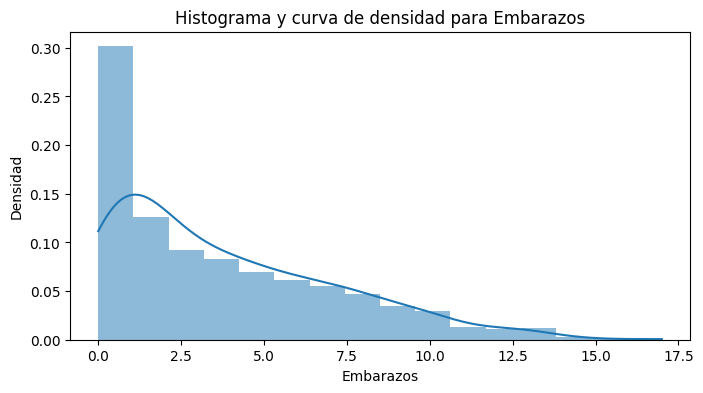

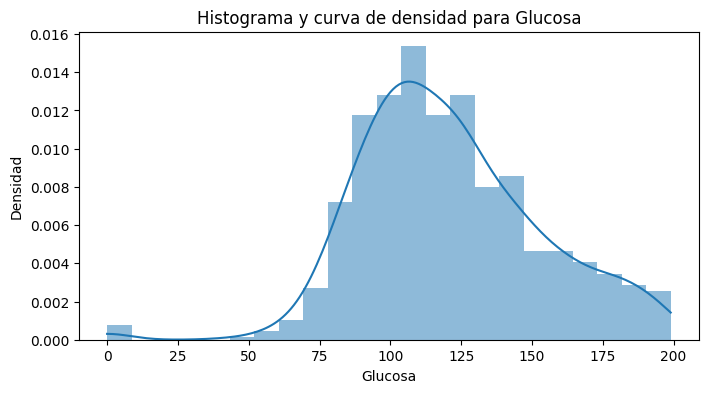

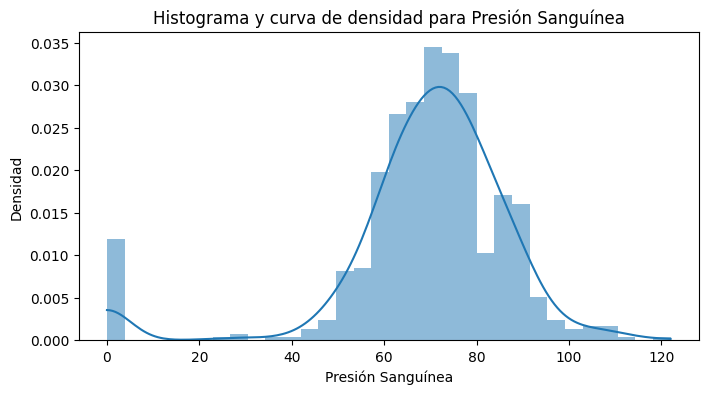

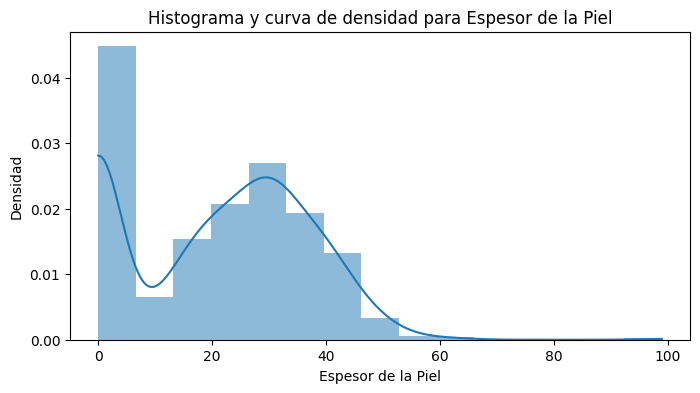

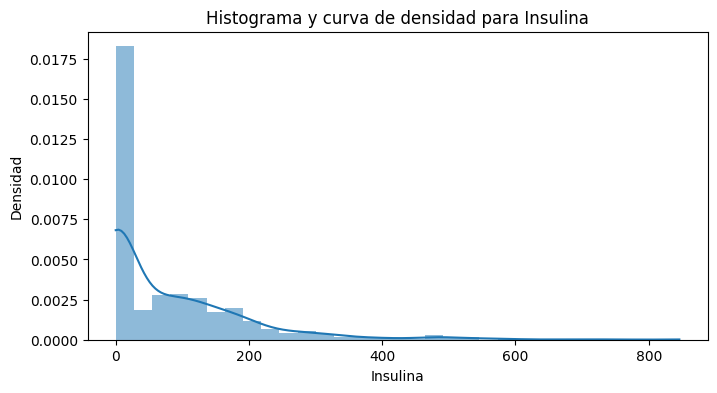

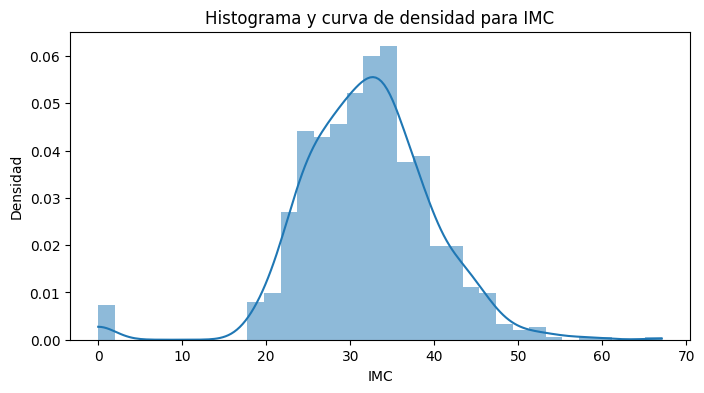

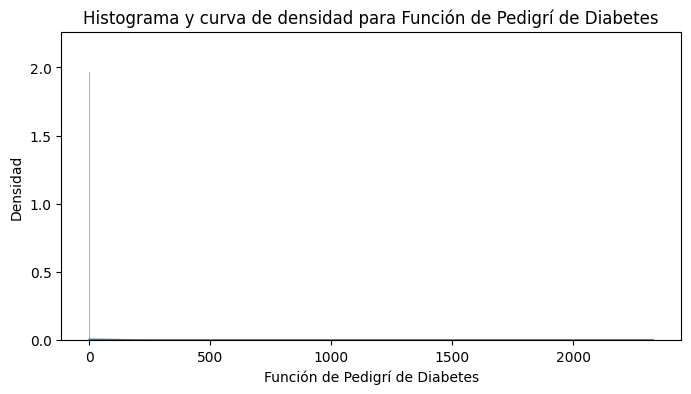

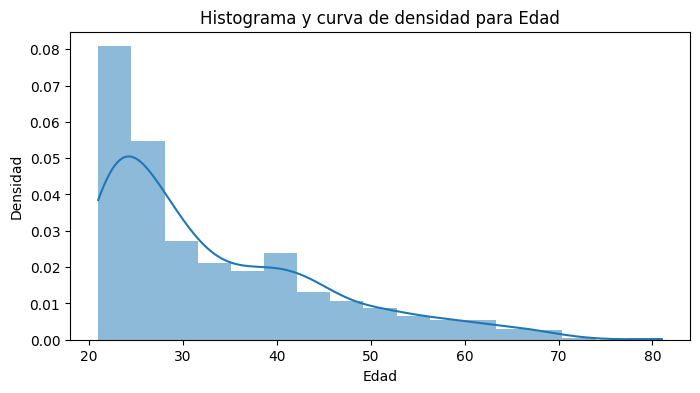

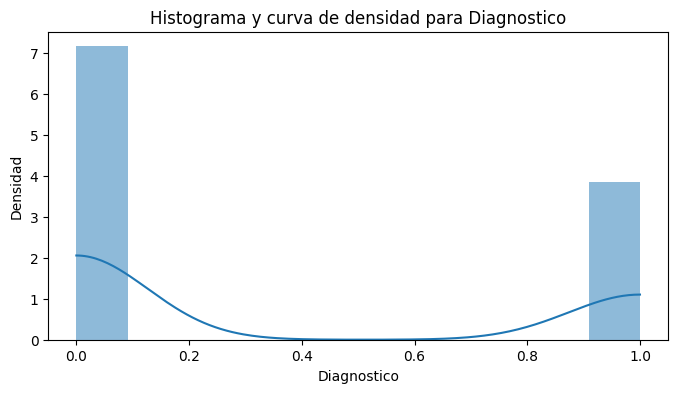

In [17]:
# Graficar el histograma con la curva de densidad para cada columna numérica de la base de datos
for col in df.select_dtypes(include=['int', 'float']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, stat="density", linewidth=0)
    plt.title(f"Histograma y curva de densidad para {col}")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.show()

* La variable **embarazos** muestra una distribución asimétrica con sesgo a la derecha, lo que indica que el número de embarazos en la mayoría de las mujeres es bajo.

* La variable **glucosa** también presenta una distribución asimétrica, pero con sesgo a la izquierda. Observamos valores de glucosa iguales a 0, lo cual es improbable y posiblemente indica un error o la ausencia de medición, ya que un nivel de glucosa de 0 implicaría la muerte, debido a que la glucosa es esencial para el funcionamiento de órganos vitales, especialmente el cerebro. Incluso en ayunas, el cuerpo mantiene niveles mínimos de glucosa en sangre para asegurar la supervivencia.

* La variable **presión sanguínea** tiene una distribución asimétrica con sesgo a la izquierda y también contiene valores de 0. Esto podría deberse a la falta de medición, ya que una presión sanguínea de 0 sería incompatible con la vida.

* La variable **espesor de la piel** muestra una distribución asimétrica con sesgo a la derecha y presenta valores de 0 mm. Esto es poco realista, ya que implicaría la ausencia de piel, lo que probablemente indica que no se realizó la medición en algunos casos.

* La variable **insulina** tiene una distribución asimétrica con sesgo a la derecha y también contiene valores de 0. Aunque en casos extremos, como en la diabetes tipo 1, la producción de insulina puede ser muy baja, rara vez se observa un nivel de 0 en pruebas de laboratorio. Por lo tanto, estos valores probablemente representan la falta de medición.

* La variable **IMC** muestra una distribución aproximadamente simétrica, pero contiene valores de 0, lo que sugiere que la medición no se realizó en algunos casos, ya que incluso una persona extremadamente delgada debería tener un IMC superior a 0.

* En el histograma de la variable **Función de Pedigrí de Diabetes**, no se evidencia claramente la distribución debido al amplio rango de valores entre el mínimo y el máximo.

* La variable **edad** muestra una distribución asimétrica con sesgo a la derecha, indicando que la mayoría de las pacientes son jóvenes.

* En la variable objetivo **diagnóstico**, observamos que hay más personas sin diagnóstico de diabetes que personas diagnosticadas con la enfermedad.

<font color='056938'> **¿Qué decisión se toma frente a los valores de cero que se presentan en las variables?** </font>

Como se mencionó anteriormente, los valores cero en algunas variables probablemente indican que no se realizó la medición de dicha variable en la paciente, seria como una información faltante, ya que un valor de cero no es realista en el contexto de las  variables Glucosa, Presión Sanguínea, Espesor de la Piel, Insulina y IMC. Por lo tanto, se decide realizar una imputación utilizando el valor medio, ya que eliminar todas las observaciones con valores de cero reduciría significativamente el tamaño del conjunto de datos.

In [18]:
# Crear una copia del DataFrame
imputado_df = df.copy()

# Lista de columnas específicas para imputar valores cero
columnas_a_imputar = ['Glucosa', 'Presión Sanguínea', 'Espesor de la Piel', 'Insulina', 'IMC']

# Imputar cada columna que tenga valores cero con su respectivo promedio
for col in columnas_a_imputar:
    # Calcular el promedio de la columna, excluyendo los ceros
    promedio = imputado_df[imputado_df[col] != 0][col].mean()
    # Reemplazar los ceros con el promedio
    imputado_df.loc[imputado_df[col] == 0, col] = promedio

imputado_df

<ipython-input-18-2a05315a4d92>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '121.6867627785059' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  imputado_df.loc[imputado_df[col] == 0, col] = promedio
<ipython-input-18-2a05315a4d92>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.40518417462484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  imputado_df.loc[imputado_df[col] == 0, col] = promedio
<ipython-input-18-2a05315a4d92>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.153419593345657' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  imputado_df.loc[imputado_df[col] == 0, col] = promedio
<ipython-input-

,Embarazos,Glucosa,Presión Sanguínea,Espesor de la Piel,Insulina,IMC,Función de Pedigrí de Diabetes,Edad,Diagnostico
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2288.000,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


<font color='056938'> **2.2 Identificación de datos atípicos** </font>

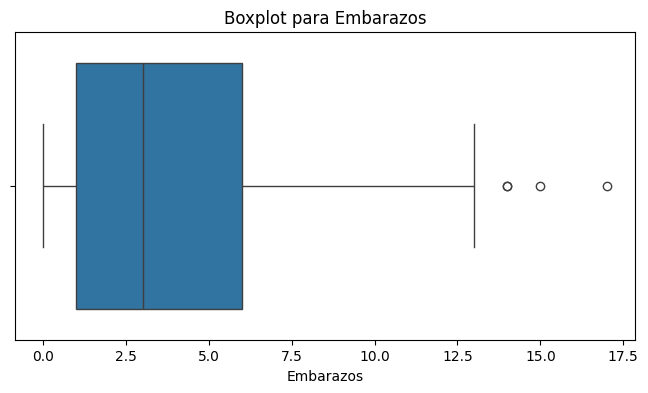

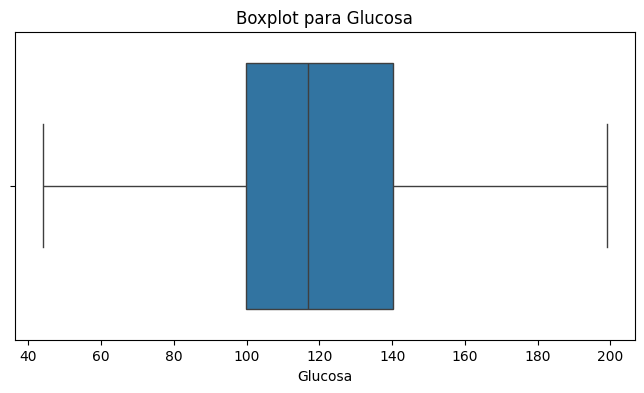

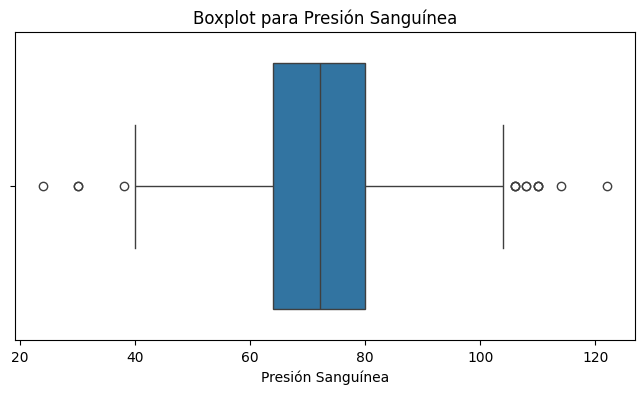

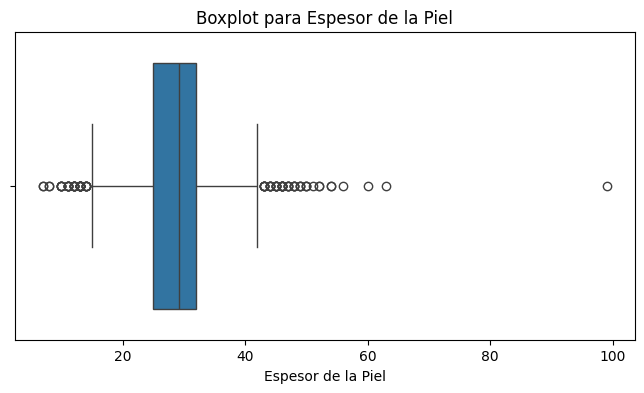

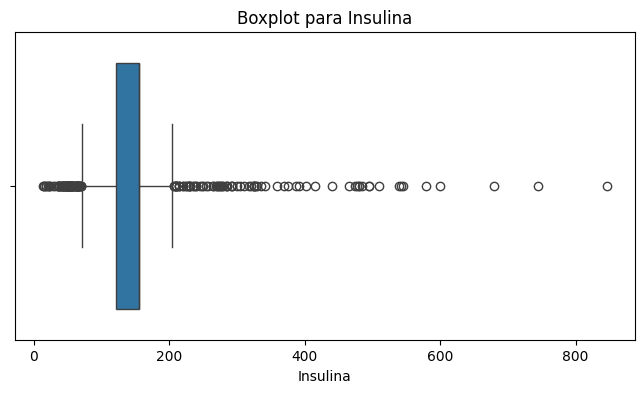

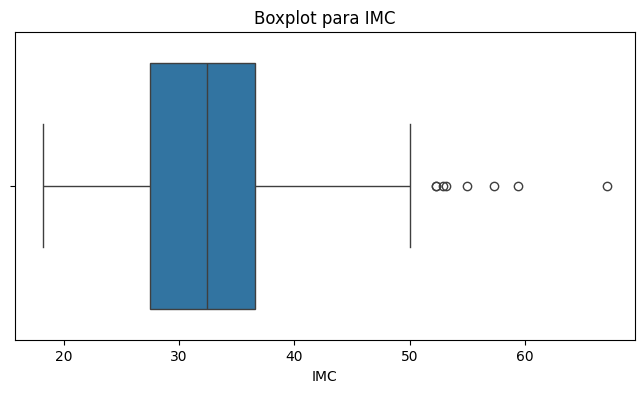

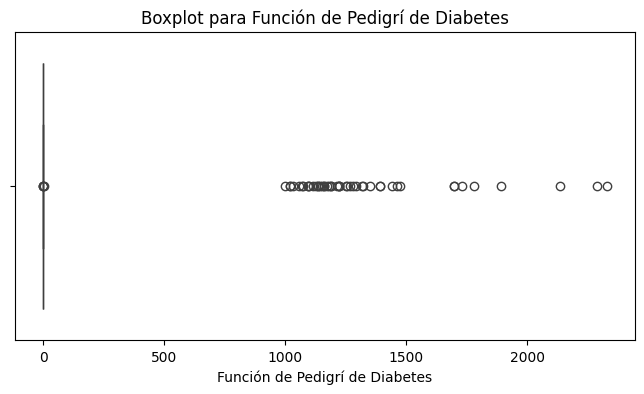

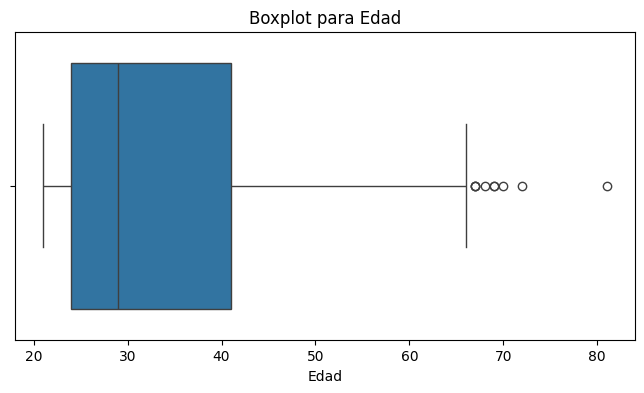

In [19]:
# Seleccionamos las columnas numéricas del DataFrame, excluyendo la columna 'Diagnóstico'
numeric_cols = imputado_df.select_dtypes(include=['int', 'float']).columns
numeric_cols = [col for col in numeric_cols if col != 'Diagnostico']

# Generamos un boxplot para cada columna numérica
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=imputado_df, x=col)
    plt.title(f"Boxplot para {col}")
    plt.xlabel(col)
    plt.show()

A pesar de haber imputado los valores cero, considerados previamente como atípicos, en las variables de Glucosa, Presión Sanguínea, Espesor de la Piel, Insulina y IMC, todavía persisten otros valores atípicos. En particular, se observa una alta cantidad de datos atípicos en las variables de Insulina, Espesor de la Piel y Función de Pedigrí de Diabetes. Por lo tanto, se procederá a identificar y analizar estos valores atípicos en dichas variables.

<font color='056938'> **Valores atipicos de la variable Insulina** </font>

Los valores normales de insulina en ayunas para personas sin diabetes suelen encontrarse entre 5-25 μU/ml, con elevaciones que van de 60 a 90 μU/ml después de ingerir alimentos. En el caso de personas con diabetes tipo 1, el cuerpo produce poca insulina debido a que el sistema inmunológico ataca las células beta del páncreas, responsables de su producción. Por esta razón, sin tratamiento, los niveles de insulina en personas con diabetes tipo 1 son generalmente muy bajos, usualmente por debajo de 5 μU/ml. Para personas con diabetes tipo 2, en cambio, los niveles de insulina en ayunas pueden ser elevados debido a la resistencia a la insulina, frecuentemente superando el rango normal y alcanzando niveles entre 30 y 300 μU/ml en casos de resistencia severa (Samuel, 2022; Ortiz & Abundis, 2021).

Con base en esta información, valores superiores a 300 μU/ml se consideran atípicos y pueden indicar una condición médica poco común o posibles errores en los datos.

In [20]:
# Definir limite
superior = 300
# Identificar outliers
outliers_insulina = imputado_df[(imputado_df['Insulina']> superior)]
outliers_insulina

,Embarazos,Glucosa,Presión Sanguínea,Espesor de la Piel,Insulina,IMC,Función de Pedigrí de Diabetes,Edad,Diagnostico
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
54,7,150.0,66.0,42.0,342.0,34.7,0.718,42,0
56,7,187.0,68.0,39.0,304.0,37.7,0.254,41,1
111,8,155.0,62.0,26.0,495.0,34.0,0.543,46,1
139,5,105.0,72.0,29.0,325.0,36.9,0.159,28,0
153,1,153.0,82.0,42.0,485.0,40.6,0.687,23,0
186,8,181.0,68.0,36.0,495.0,30.1,0.615,60,1
199,4,148.0,60.0,27.0,318.0,30.9,0.150,29,1
220,0,177.0,60.0,29.0,478.0,34.6,1072.000,21,1


In [21]:
outliers_insulina.shape

(37, 9)

Se observan 37 datos atipicos en la variable Insulina

<font color='056938'> **Valores atipicos de la variable Espesor de la piel** </font>

Con respecto a esta variable, no se encontró información precisa sobre el rango normal del espesor de la piel en el tríceps para mujeres adultas. Por lo tanto, se optó por utilizar la técnica del rango intercuartílico (IQR) para identificar los posibles datos atípicos en esta variable.

In [22]:
# Calcular cuartiles a partir de la función percentil
Q3 = imputado_df['Espesor de la Piel'].quantile(0.75) # Tercer cuartil = Percentil 75
Q1 = imputado_df['Espesor de la Piel'].quantile(0.25) # Primer cuartil + Percentil 25

# Obtener RIC
ric = Q3 - Q1

# Definir limite inferior y superior
superior = Q3 + (2.5 * ric)
inferior = Q1 - (2.5* ric)

# Identificar outliers
outliers_espesor = imputado_df[(imputado_df['Espesor de la Piel'] < inferior) | (imputado_df['Espesor de la Piel']> superior)]
outliers_espesor

,Embarazos,Glucosa,Presión Sanguínea,Espesor de la Piel,Insulina,IMC,Función de Pedigrí de Diabetes,Edad,Diagnostico
57,0,100.0,88.0,60.0,110.000000,46.8,0.962,31,0
86,13,106.0,72.0,54.0,155.548223,36.6,0.178,45,0
99,1,122.0,90.0,51.0,220.000000,49.7,0.325,31,1
120,0,162.0,76.0,56.0,100.000000,53.2,0.759,25,1
150,1,136.0,74.0,50.0,204.000000,37.4,0.399,24,0
211,0,147.0,85.0,54.0,155.548223,42.8,0.375,24,0
254,12,92.0,62.0,7.0,258.000000,27.6,0.926,44,1
273,1,71.0,78.0,50.0,45.000000,33.2,0.422,21,0
275,2,100.0,70.0,52.0,57.000000,40.5,0.677,25,0
445,0,180.0,78.0,63.0,14.000000,59.4,2.420,25,1


Se observa que los datos atípicos del espesor de la piel en el tríceps, específicamente los valores de 7 mm, parecen estar justificados. Esto se debe a que las dos pacientes con estos valores presentan un IMC bajo de 27.6 y 19.6 kg/m², mientras que las pesonas con un mayor IMC tienen un espesor en la piel mas alto, lo que sugiere que el espesor de la piel está relacionado con su índice de masa corporal. Dado que el espesor de la piel puede variar dependiendo de la cantidad de masa grasa en el cuerpo, estos valores no parecen ser errores de ingreso de datos, sino que podrían reflejar variaciones naturales en la población.

<font color='056938'> **Valores atipicos de la variable Función de Pedigrí de Diabetes** </font>


Se observa que la variable Función de Pedigrí de Diabetes presenta los datos atípicos más extremos en el conjunto de datos. Esta variable mide la probabilidad de desarrollar diabetes en función de los antecedentes familiares. Según el rango considerado como realista por Faruk (2022), los valores de Función de Pedigrí de Diabetes deberían oscilar entre 0.078 y 2.42. Por lo tanto, los valores fuera de este rango, tanto por debajo de 0.078 como por encima de 2.42, se consideran atípicos. Con esta información, se procede a la identificación de los valores atípicos de esta variable, basándonos en el rango mencionado como representativo de datos realistas.





In [23]:
# Definir limite inferior y superior
superior = 2.42
inferior = 0.078

# Identificar outliers
outliers_funped = imputado_df[(imputado_df['Función de Pedigrí de Diabetes'] < inferior) | (imputado_df['Función de Pedigrí de Diabetes']> superior)]
outliers_funped

,Embarazos,Glucosa,Presión Sanguínea,Espesor de la Piel,Insulina,IMC,Función de Pedigrí de Diabetes,Edad,Diagnostico
4,0,137.0,40.0,35.00000,168.000000,43.100000,2288.0,33,1
12,10,139.0,80.0,29.15342,155.548223,27.100000,1441.0,57,0
45,0,180.0,66.0,39.00000,155.548223,42.000000,1893.0,25,1
58,0,146.0,82.0,29.15342,155.548223,40.500000,1781.0,44,0
100,1,163.0,72.0,29.15342,155.548223,39.000000,1222.0,33,1
131,9,122.0,56.0,29.15342,155.548223,33.300000,1114.0,33,1
152,9,156.0,86.0,28.00000,155.000000,34.300000,1189.0,42,1
187,1,128.0,98.0,41.00000,58.000000,32.000000,1321.0,33,1
218,5,85.0,74.0,22.00000,155.548223,29.000000,1224.0,32,1
220,0,177.0,60.0,29.00000,478.000000,34.600000,1072.0,21,1


Se obsrvan 47 datos atipicos en la variable Función de Pedigrí de Diabetes

<font color='056938'> **¿Qué decisión se toma frente a los outliers?** </font>

En relación con las variables de insulina y Función de Pedigrí de Diabetes, se ha decidido imputar los valores atípicos utilizando el promedio, ya que se identificaron como datos extremos que no son realistas o no están justificados. Por otro lado, respecto a los valores atípicos de la variable espesor de la piel, se optó por mantenerlos, ya que se comprobó que estos valores están justificados y no representan errores en los datos.



In [24]:
# Calcular el promedio de cada columna, excluyendo los outliers
promedio_insulina = imputado_df[~imputado_df.index.isin(outliers_insulina.index)]['Insulina'].mean()
promedio_funped = imputado_df[~imputado_df.index.isin(outliers_funped.index)]['Función de Pedigrí de Diabetes'].mean()

# Crear una copia para evitar modificar el DataFrame original
df_sinoutlier = imputado_df.copy()

# Reemplazar los valores atípicos con el promedio de cada columna
# Para 'Insulina'
df_sinoutlier.loc[outliers_insulina.index, 'Insulina'] = promedio_insulina

# Para 'Función de Pedigrí de Diabetes'
df_sinoutlier.loc[outliers_funped.index, 'Función de Pedigrí de Diabetes'] = promedio_funped

# Mostrar el DataFrame con los valores imputados
df_sinoutlier

,Embarazos,Glucosa,Presión Sanguínea,Espesor de la Piel,Insulina,IMC,Función de Pedigrí de Diabetes,Edad,Diagnostico
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627000,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351000,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672000,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167000,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,0.416104,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171000,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340000,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245000,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349000,47,1


Veamos como se ven nuevamente la distribución de las variables despues de la imputación de los outliers.

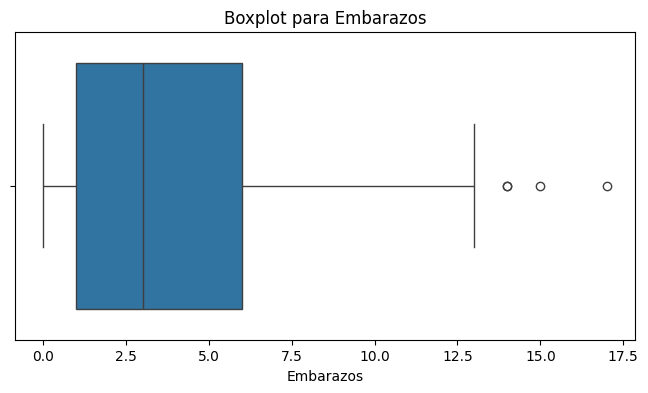

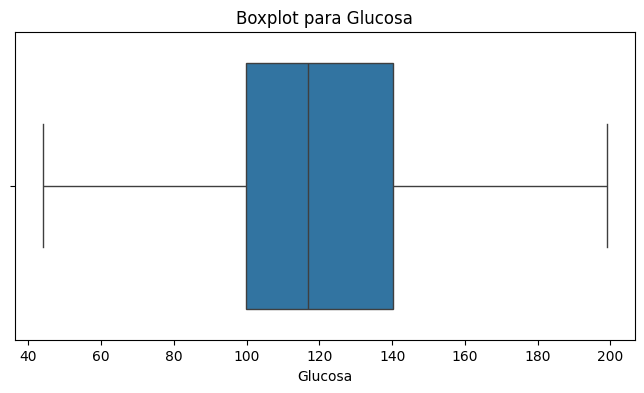

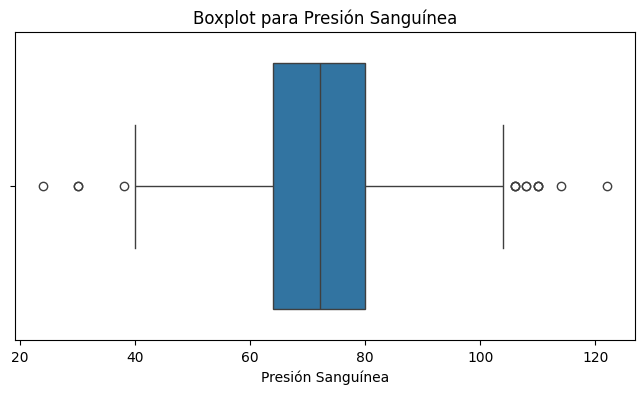

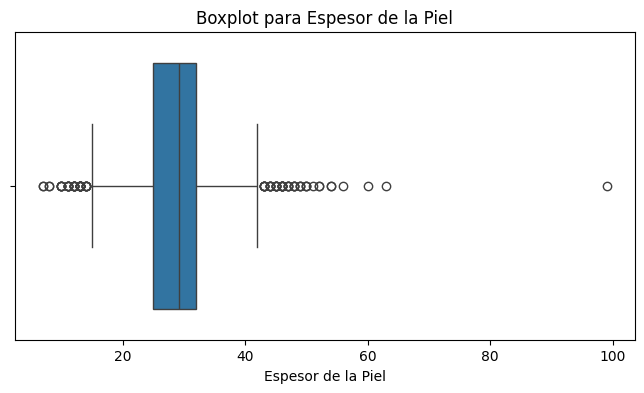

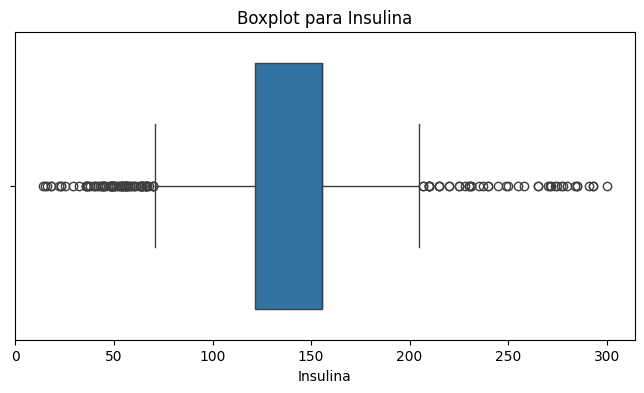

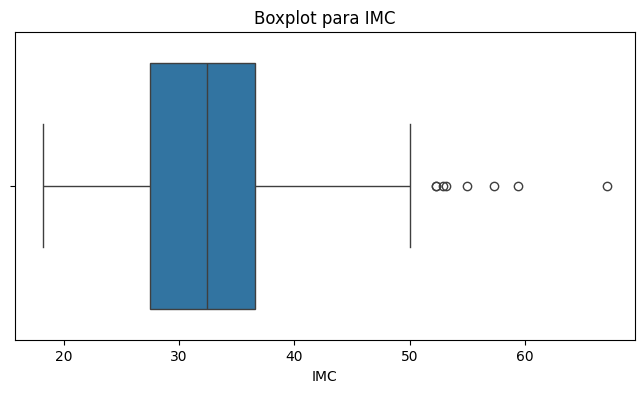

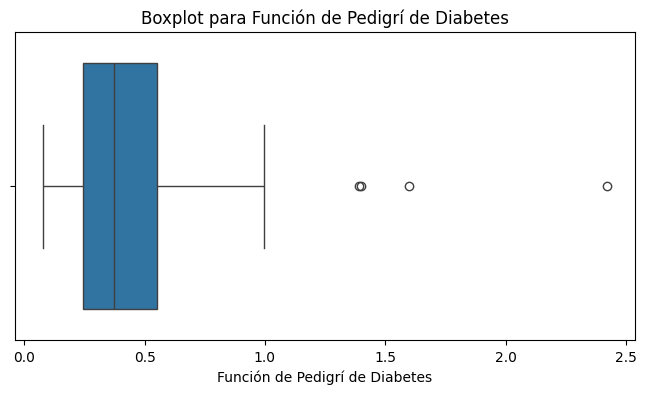

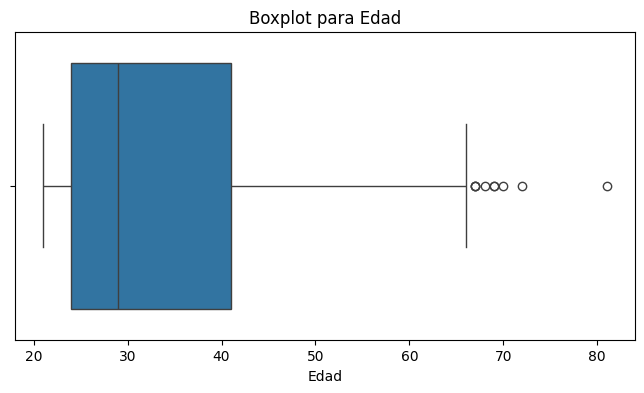

In [25]:
# Seleccionamos las columnas numéricas del DataFrame, excluyendo la columna 'Diagnóstico'
numeric_cols = df_sinoutlier.select_dtypes(include=['int', 'float']).columns
numeric_cols = [col for col in numeric_cols if col != 'Diagnostico']

# Generamos un boxplot para cada columna numérica
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_sinoutlier, x=col)
    plt.title(f"Boxplot para {col}")
    plt.xlabel(col)
    plt.show()

Después de la imputación, se observó que la variable Insulina pasó de presentar valores de hasta 800 μU/ml a valores cercanos a 300 μU/ml, lo cual se ajusta a un rango más realista. Además, para la variable Función de Pedigrí de Diabetes, se redujeron significativamente los valores extremos, y los datos ahora se encuentran dentro de un rango más coherente.

<font color='056938'> **2.3 Análisis de correlación entre variables** </font>

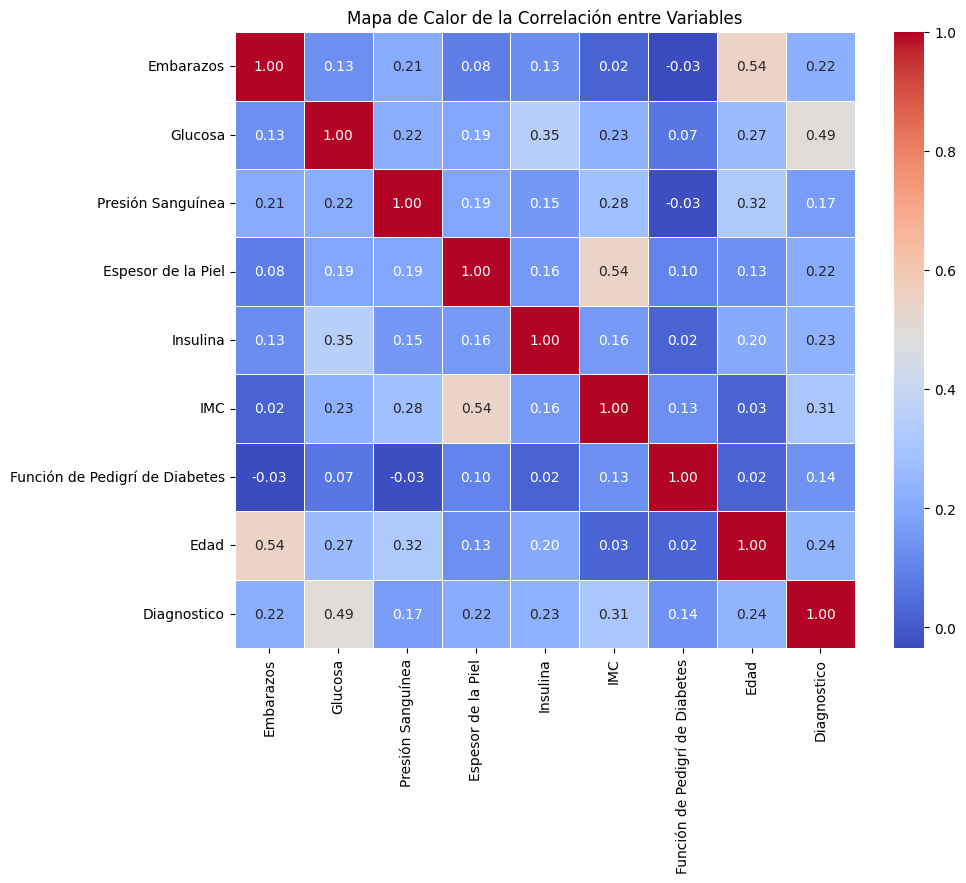

In [26]:
correlation_matrix = df_sinoutlier[df_sinoutlier.select_dtypes(include=['int', 'float']).columns].corr()
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Calor de la Correlación entre Variables")
plt.show()

Se observa que no existen problemas de multicolinealidad, ya que ninguna de las variables presenta correlaciones excesivamente altas entre sí. Esto sugiere que las variables independientes no están fuertemente relacionadas, lo cual es ideal para evitar redundancia en los datos y asegurar que cada variable aporte información única al modelo.

<font color='056938'> **2.4.Correlación variables númericas con la variable respuesta**</font>

Se realiza la correlación de Spearman

In [27]:
numeric_vars = df_sinoutlier.select_dtypes(include=['int', 'float']).columns

# Calcular correlación de Spearman
spearman_corr = df_sinoutlier[numeric_vars].corr(method='spearman')['Diagnostico']

print("\nCorrelaciones de Spearman con la variable respuesta Diagnostico:")
print(spearman_corr)


Correlaciones de Spearman con la variable respuesta Diagnostico:
Embarazos                         0.198689
Glucosa                           0.481630
Presión Sanguínea                 0.171652
Espesor de la Piel                0.214430
Insulina                          0.213755
IMC                               0.306577
Función de Pedigrí de Diabetes    0.144725
Edad                              0.309040
Diagnostico                       1.000000
Name: Diagnostico, dtype: float64


Se observa que la glucosa, la edad y el IMC son las variables con mayor correlación positiva respecto al diagnóstico de diabetes, mientras que la presión sanguínea y la función de pedigrí de diabetes muestran correlaciones más débiles. Sin embargo, se decide conservar estas variables con correlación baja, ya que eliminarlas dejaría un conjunto de variables limitado. Además, aunque glucosa, edad e IMC tienen las correlaciones más altas, sus valores no son tan cercanos a 1, lo cual indica que su relación con el diagnóstico, aunque relevante, no es extremadamente fuerte. Mantener todas las variables podría proporcionar una visión más integral y captar interacciones que un modelo con menos variables podría pasar por alto.

**Variables finales del modelo:** Embarazos,	Glucosa,	Presión Sanguínea,	Espesor de la Piel,	Insulina, IMC, Función de Pedigrí de Diabetes, Edad	Diagnostico

In [28]:
# Guardar
df_sinoutlier.to_excel('/content/drive/MyDrive/Mod2/Salud/data/df_limpia.xlsx', index=False)

Esta será la base de datos que utilizará para realizar los modelos